In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# to perform statistical test
from sklearn.feature_selection import chi2 # for categorical fetures
from sklearn.feature_selection import f_classif # for numerical features (Anova f-test)

# impot pipeline
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset =pd.read_csv('/content/drive/MyDrive/Credit_Score_Clean.csv')
dataset.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,5,4,6.27,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
1,23,Scientist,19114.12,3,4,3,4,6,0,11.27,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
2,23,Scientist,19114.12,3,4,3,4,3,8,11.27,...,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
3,23,Scientist,19114.12,3,4,3,4,3,6,11.27,...,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
4,28,Teacher,34847.84,2,4,6,1,7,1,7.42,...,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320


Shape of dataset

In [ ]:
print(f'Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns')

Dataset has 31711 rows and 21 columns


Check Numerical Features

In [ ]:
numerical_features = dataset.select_dtypes(include=np.number).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months']


Check Catagorical Features

In [ ]:
categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


Check Details of Dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31711 entries, 0 to 31710
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        31711 non-null  int64  
 1   Occupation                 31711 non-null  object 
 2   Annual_Income              31711 non-null  float64
 3   Num_Bank_Accounts          31711 non-null  int64  
 4   Num_Credit_Card            31711 non-null  int64  
 5   Interest_Rate              31711 non-null  int64  
 6   Num_of_Loan                31711 non-null  int64  
 7   Delay_from_due_date        31711 non-null  int64  
 8   Num_of_Delayed_Payment     31711 non-null  int64  
 9   Changed_Credit_Limit       31711 non-null  float64
 10  Num_Credit_Inquiries       31711 non-null  float64
 11  Credit_Mix                 31711 non-null  object 
 12  Outstanding_Debt           31711 non-null  float64
 13  Credit_Utilization_Ratio   31711 non-null  flo

Check for missing Values

In [ ]:
dataset.isnull().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


Let's see statistical description of dataset

In [ ]:
dataset['Occupation'].unique()

array(['Scientist', 'Teacher', 'Entrepreneur', 'Developer', 'Lawyer',
       'Journalist', 'Engineer', 'Accountant', 'Musician', 'Architect',
       'Writer', 'Manager', 'Media_Manager', 'Doctor', 'Mechanic'],
      dtype=object)

Plot occupation using pie chart

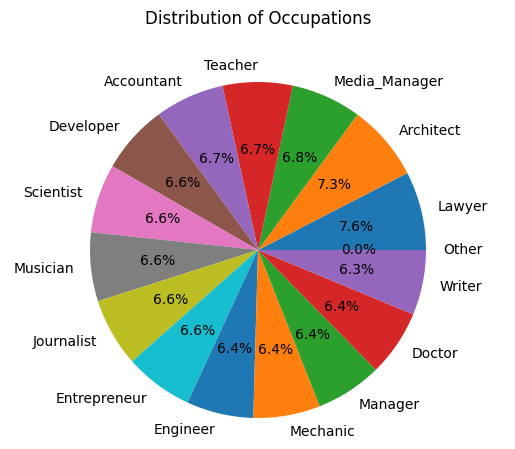

In [ ]:

counts = dataset['Occupation'].value_counts()
main = counts[counts / counts.sum() >= 0.05]
main['Other'] = counts[counts / counts.sum() < 0.05].sum()
plt.pie(main, labels=main.index, autopct='%1.1f%%')
plt.title('Distribution of Occupations', pad=30)
plt.axis('equal')
plt.show()

In [ ]:
'Credit_Mix'

dataset['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
dataset['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [ ]:
# Payment_Behaviour
dataset['Payment_Behaviour'].unique()

array(['Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Large_value_payments',
       'High_spent_Small_value_payments'], dtype=object)

In [ ]:
# Credit_Score

dataset['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
dataset['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,19730
Good,7551
Poor,4430


dtype: int64

In [ ]:
# prompt: what do you understand by this
#   count
# Credit_Score
# Standard  19730
# Good  7551
# Poor  4430
# dtype: int64

# This output shows the count of each unique value in the 'Credit_Score' column.

# It means:
# - There are 19730 rows with 'Standard' credit score.
# - There are 7551 rows with 'Good' credit score.
# - There are 4430 rows with 'Poor' credit score.

# This information is useful for understanding the distribution of credit scores in the dataset and can be used for:
# -  Data analysis and visualization.
# -  Model evaluation.
# -  Identifying potential class imbalances.

Feature Engineering

In [ ]:
# Create a new column 'Credit_Score' with 1 for 'Good' and 'Standard' and 0 for 'Poor'
dataset['Credit_Score'] = dataset['Credit_Score'].apply(lambda x: 1 if x in ['Good', 'Standard'] else 0)

# Now you have a binary classification target variable
print(dataset['Credit_Score'].value_counts())

Credit_Score
1    27281
0     4430
Name: count, dtype: int64


In [ ]:
dataset.sample(5)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
7100,47,Teacher,11617.390,7,7,16,1,22,16,17.01,...,Standard,816.39,26.638083,Yes,5.463309,41.975048,High_spent_Small_value_payments,297.573227,1,389
11274,15,Lawyer,92084.400,3,3,14,4,15,12,18.09,...,Standard,1265.51,27.241013,Yes,180.588365,403.961778,Low_spent_Medium_value_payments,468.319857,1,190
18451,40,Media_Manager,105239.460,7,5,14,2,16,14,9.89,...,Standard,1369.89,39.436015,Yes,171.165698,588.648166,High_spent_Small_value_payments,389.781637,1,164
479,46,Musician,142170.120,3,4,8,2,1,1,2.58,...,Good,282.56,33.894483,No,183.759513,206.362894,High_spent_Large_value_payments,1008.328592,1,292
12819,29,Engineer,18354.805,0,3,8,1,24,0,5.85,...,Good,863.63,25.720055,No,13.915906,67.843913,Low_spent_Medium_value_payments,343.996889,0,213


Statistical Test

In [ ]:
# Chi-Squared Test

categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

In [ ]:
# Label encode each categorical column
label_enc = LabelEncoder()
for col in categorical_cols:
    dataset[col] = label_enc.fit_transform(dataset[col])

In [ ]:
# Define X1 (independent variables) and y1 (target)
X1 = dataset[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']]
y1 = dataset['Credit_Score']

In [ ]:

from sklearn.feature_selection import chi2
import pandas as pd

# Assuming X1 and y1 are defined elsewhere in your code
chi2_scores, p_values = chi2(X1, y1)  # Get chi2 scores and p-values

# Create a DataFrame to store the results
chi2_scores_df = pd.DataFrame({"Feature": X1.columns, "Score": chi2_scores, "P-value": p_values})

# Print the results sorted by chi2 score
print(chi2_scores_df.sort_values(by="Score", ascending=False))

                 Feature       Score       P-value
1             Credit_Mix  288.745515  9.330378e-65
3      Payment_Behaviour  127.452384  1.479073e-29
0             Occupation    4.753546  2.923798e-02
2  Payment_of_Min_Amount    0.001643  9.676640e-01


In [ ]:
X_num_for_f_test = dataset[['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months']]

In [ ]:
y_for_f_test = dataset['Credit_Score']

In [ ]:
f_scores, p_values = f_classif(X_num_for_f_test, y_for_f_test)

In [ ]:
f_scores_dataset = pd.DataFrame({'Feature': X_num_for_f_test.columns, 'F-Score': f_scores})

In [ ]:
print(f_scores_dataset.sort_values(by='F-Score', ascending=False))

                      Feature      F-Score
6         Delay_from_due_date  1290.385124
3             Num_Credit_Card  1030.110256
9        Num_Credit_Inquiries   585.906436
4               Interest_Rate   453.047239
10           Outstanding_Debt   451.549924
5                 Num_of_Loan   274.356620
15  Credit_History_Age_Months    92.515418
12        Total_EMI_per_month    28.425328
8        Changed_Credit_Limit    27.130593
13    Amount_invested_monthly    20.350875
0                         Age    11.370137
2           Num_Bank_Accounts     6.047901
11   Credit_Utilization_Ratio     2.873588
7      Num_of_Delayed_Payment     2.290066
1               Annual_Income     0.064910
14            Monthly_Balance     0.030461


In [ ]:

# List of selected features (from the above chi-squared and F-test results)
selected_features = [
    'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
    'Delay_from_due_date', 'Interest_Rate', 'Num_Credit_Card',
    'Num_Bank_Accounts', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Num_of_Loan', 'Outstanding_Debt', 'Occupation'
]

Model Training

In [ ]:
# Define X (independent variables) and y (target variable)
X = dataset[selected_features]
y = dataset['Credit_Score']  # Assuming 'loan_eligibility' is the target

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test_scaled)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.9124490518834942
Test Accuracy: 0.9132902412107835

Model: Gradient Boosting
Cross-validation Accuracy: 0.8893094676609946
Test Accuracy: 0.8948447107047138

Model: Support Vector Machine
Cross-validation Accuracy: 0.8595474693829569
Test Accuracy: 0.8918492826738137

Model: Logistic Regression
Cross-validation Accuracy: 0.8732262534205952
Test Accuracy: 0.8795522623364339

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.8879298621676538
Test Accuracy: 0.8909033580324768

Model: Decision Tree
Cross-validation Accuracy: 0.8696783601126354
Test Accuracy: 0.8749802932366388

Model: Ada Boost
Cross-validation Accuracy: 0.8755913913077192
Test Accuracy: 0.8801828787639918

Model: XG Boost
Cross-validation Accuracy: 0.9020421825579881
Test Accuracy: 0.9052498817594198

Model: Naive Bayes
Cross-validation Accuracy: 0.8749211686748326
Test Accuracy: 0.8781333753744285

Best Model: Pipeline(steps=[('model', RandomForestClassifier(random_

Model Evaluation

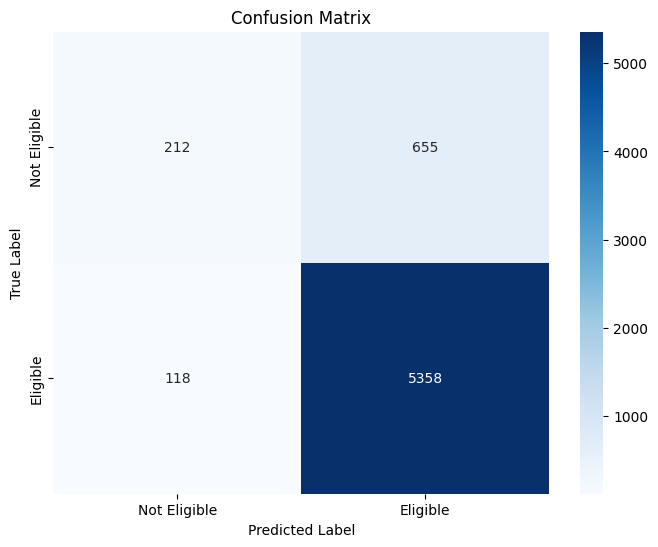

In [ ]:

# prompt: draw a confusion matrix of my models results

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_pred' contains the predictions from your best model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Eligible', 'Eligible'],
            yticklabels=['Not Eligible', 'Eligible'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Saving Best Model

In [ ]:
import pickle
pickle.dump(best_model, open('01_credit_scoring_model.pkl', 'wb'))

Making Prediction With Saved Model

In [92]:
import pickle
# Load the saved model
loaded_model = pickle.load(open('01_credit_scoring_model.pkl', 'rb'))
# Assume sample_data is your input data for prediction

# Replace this with your actual sample data
sample_data = X_test.iloc[[0]]  # Taking the first row of X_test as an example

# Make prediction
prediction = loaded_model.predict(sample_data)

# Get prediction probability (if applicable)
prob = loaded_model.predict_proba(sample_data)[0][1]  # Probability of class 1

if prediction[0] == 1:
    print(f"User should be given a loan. (Probability: {prob:.2f})")
else:
    print(f"User should not be given a loan. (Probability: {prob:.2f})")

User should not be given a loan. (Probability: 0.32)
